# Implementing Simple Linear Regression

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [41]:
# creating x and y values

slope_m = 4
intercept_b = 10


x_start = 10
x_stop = 30
x_points = 100

x = np.linspace(x_start,x_stop,x_points)

y = np.array([ i*slope_m+intercept_b+(random.uniform(-1,1)*20)  for i in x])

y_original = np.array([i*slope_m+intercept_b  for i in x])

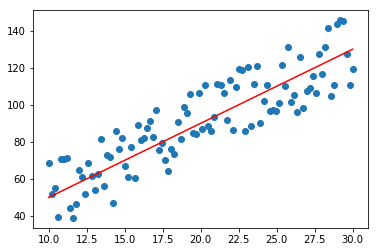

In [45]:
# visualising x and y 

plt.scatter(x,y)
plt.plot(x,y_original,'r-')

#### 1.Finding 'm' and 'b' using statistical method

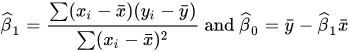

In [15]:
# finding mean x and mean y
mean_x = np.mean(x)
mean_y = np.mean(y)

In [29]:
# finding diff between mean and individual value
x_diff = np.array([i-mean_x for i in x])
y_diff = np.array([i-mean_y for i in y])

In [37]:
# slope value
slope_stats = sum(x_diff*y_diff)/sum(x_diff**2)

In [38]:
#  calculating intercept  b = y_av - slope *x_av
intercept_stats = mean_y - slope_stats*mean_x

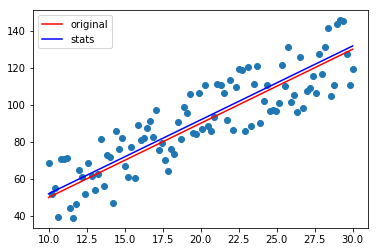

In [47]:
# visualizing dataset, new line and comparing it with the original line 

y_stats = np.array([slope_stats*i+intercept_stats for i in x])

plt.scatter(x,y)
plt.plot(x,y_original,'r-',label = 'original')
plt.plot(x,y_stats,'b-',label = 'stats')
plt.legend()

#### 2.Finding 'm' and 'b' using gradient descent
Cost $$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
$$

Gradient

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
$$
Gradients $$
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
$$$$
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
$$$$
\theta_2: = \theta_2-\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
$$

$$
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)})
$$

In [101]:
# defining funciton for calculating error

def compute_error(y_original,y_hat):
    y_diff_square = (y_hat-y_original)**2
    
    return sum(y_diff_square)/(len(y_original)*2)
    

In [133]:
# defining function for gradient descent

def gradient_descent(slope_gd,intercept_gd,x,y,learning_rate = 0.0001,iterations= 1000):
        
    
    cost_history = np.zeros(iterations)
    slope_history = np.zeros(iterations)
    intercept_history = np.zeros(iterations)
    
    precision = 0.01
    
    for it in range(iterations):
        
        pred = np.array([i*slope_gd+intercept_gd for i in x])
        
        error = compute_error(y,pred)
        
        cost_history[it] = error
        slope_history[it] = slope_gd
        intercept_history[it] = intercept_gd
        
        diff_pred_y = pred-y

        grad_m = sum(diff_pred_y*x)/len(x)
        grad_b = sum(diff_pred_y)/len(x)
        
        slope_gd -=learning_rate*grad_m
        intercept_gd -=learning_rate*grad_b
        
        if it!=0:
            if (cost_history[it-1]-cost_history[it]<0):
                print("Cost function is increasing alter the learning rate, breaking out of the loop")
                break
            if (cost_history[it-1]-cost_history[it])<precision:
                print("Near the optimum value hence breaking out of the loop")
                print("Iteration no: {}".format(it+1))
                break

    return (cost_history,slope_history,intercept_history)

In [115]:
# random initialisation of slope and intercept

slope_gd = np.random.randint(-10,10)
intercept_gd = np.random.randint(-10,10)

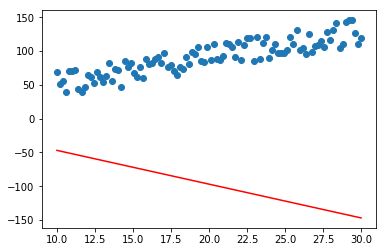

In [135]:
# plotting intial line and dataset

plt.scatter(x,y)
plt.plot(x,[i*slope_gd+intercept_gd for i in x],'-r')

In [136]:
# calculating initial error
initial_error = compute_error(y,np.array([i*slope_gd+intercept_gd for i in x]))
initial_error

19084.370772070222

In [140]:
# getting the cost_history , slope_history and intercept_history

(cost_history,slope_history,intercept_history) = \
        gradient_descent(slope_gd,intercept_gd,x,y,learning_rate = 0.0001,iterations= 1000)

Near the optimum value hence breaking out of the loop
Iteration no: 137


In [141]:
# triming the zeros at end
cost_history = np.trim_zeros(cost_history)
cost_history.shape

(137,)

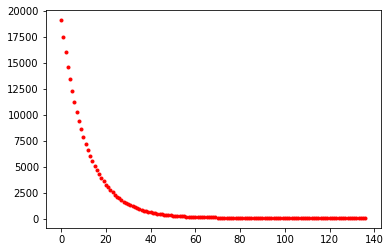

In [143]:
# plotting the cost function vs the iterations

plt.plot(range(137),cost_history,'.r')

In [146]:
# getting the final value of slope and intercept

slope_history = np.trim_zeros(slope_history)
intercept_history = np.trim_zeros(intercept_history)
slope_gd = slope_history[-1]
intercept_gd = intercept_history[-1]

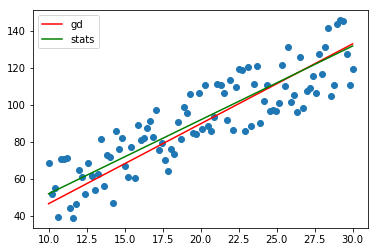

In [152]:
# plotting the best fit line after GD

plt.scatter(x,y)
plt.plot(x,[i*slope_gd+intercept_gd for i in x],'-r',label = 'gd')
plt.plot(x,[i*slope_stats+intercept_stats for i in x],'-g',label = 'stats')
plt.legend()